In [1]:
from HARK.interpolation import UnstructuredInterp, RegularizedMultivariateInterp
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def squared_coords(x, y):
    return x**2 + y**2

In [3]:
x_grid = np.geomspace(1, 11, 11) - 1
x_mat, y_mat = np.meshgrid(x_grid, x_grid, indexing="ij")
z_mat = squared_coords(x_mat, y_mat)
z_mat[5, 5] = np.nan

In [4]:
interp = UnstructuredInterp(z_mat, [x_mat, y_mat], method="cubic")

In [5]:
interp(x_mat[5, 5], y_mat[5, 5])

array(10.83262679)

In [6]:
x_new, y_new = np.meshgrid(
    np.linspace(0, 10, 11),
    np.linspace(0, 10, 11),
    indexing="ij",
)

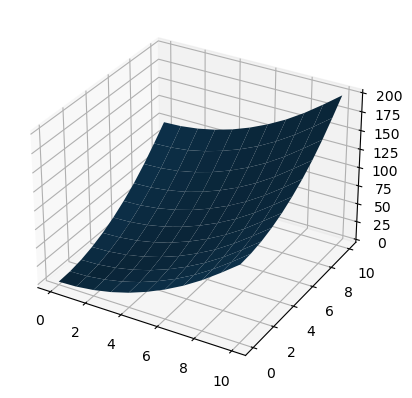

In [7]:
z_unstruc_interp = interp(x_new, y_new)

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
ax.plot_surface(x_new, y_new, z_unstruc_interp)
plt.show()

In [8]:
x_rand = np.random.rand(100) * 11
y_rand = np.random.rand(100) * 11
z_rand = squared_coords(x_rand, y_rand)

In [9]:
rand_interp = UnstructuredInterp(z_rand, [x_rand, y_rand], method="cubic")

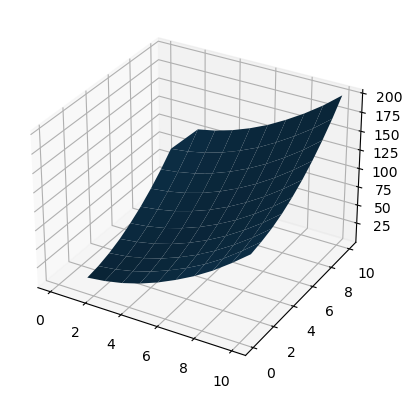

In [10]:
z_rand_interp = rand_interp(x_new, y_new)

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
ax.plot_surface(x_new, y_new, z_rand_interp)
plt.show()

In [12]:
reg_interp = RegularizedMultivariateInterp(z_mat, [x_mat, y_mat])

In [ ]:
z_reg_interp = reg_interp(x_new, y_new)

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
ax.plot_surface(x_new, y_new, z_reg_interp)
plt.show()